In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Loading

In [2]:
videos_df = pd.read_csv('US_trending.csv')

In [3]:
videos_df.head()

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending,category_name,publish_to_trend,publishing_hour,publishing_day
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11 07:08:34,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,2019-12-12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,...,20068,https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg,False,False,Late Late Show guest host Harry Styles challen...,1,Entertainment,1,7,Wednesday
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12 05:25:42,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2019-12-12,[none],423215,52780,...,13130,https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,7,How-to & Style,0,5,Thursday
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11 23:00:53,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,2019-12-12,last to leave|nba basketball|nba basketball hi...,463685,20178,...,931,https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg,False,False,"Last to miss the basketball shot wins 10,000!●...",7,Sport,1,23,Wednesday
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12 02:35:33,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2019-12-12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,...,668,https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg,False,False,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2,Sport,0,2,Thursday
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12 02:38:37,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,2019-12-12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,...,1907,https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg,False,False,LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...,6,Entertainment,0,2,Thursday


# Video likes discretization

[Text(0.5, 0, 'Likes')]

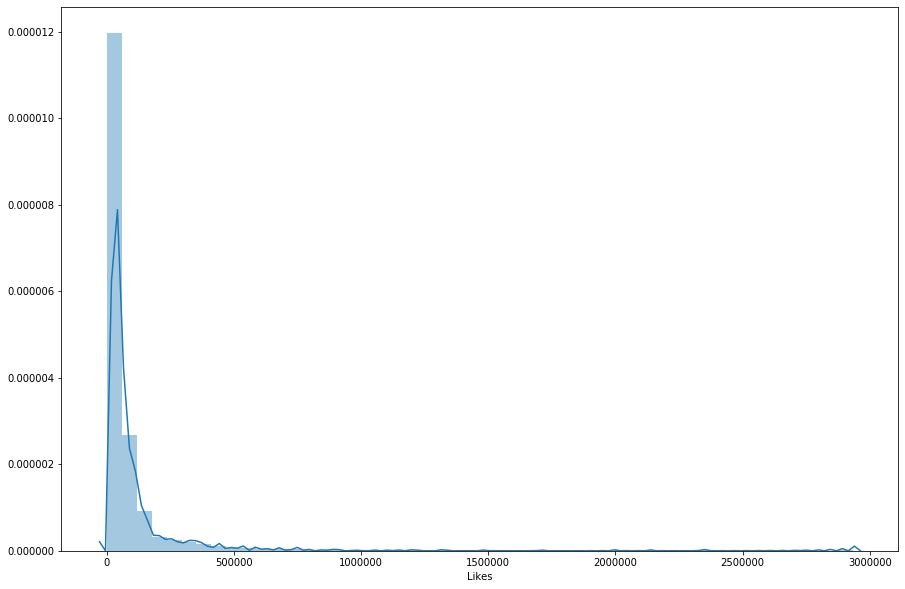

In [34]:
# distribution of trending video likes
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(videos_df['likes'])
ax.set(xlabel='Likes')

In [67]:
likes = videos_df['likes']
min_likes = min(likes)
#max_likes = max(likes)
max_likes = 100000
step = round((max_likes - min_likes) / 5)

print('Min likes: {}'.format(min_likes))
print('Max likes: {}'.format(max_likes))
print('Step: {}'.format(step))

Min likes: 0
Max likes: 100000
Step: 20000


In [68]:
def likes_discretization(likes, step, categories=5):
    min_limit = 0
    max_limit = step
    for i in range(1, categories):
        if likes >= min_limit and likes <= max_limit:
            return i
        min_limit = i * step + 1
        max_limit = min_limit + step - 1
    return categories

In [69]:
disc_likes = videos_df['likes'].apply(lambda var: likes_discretization(var, step))

[Text(0.5, 0, 'Discrete values of likes')]

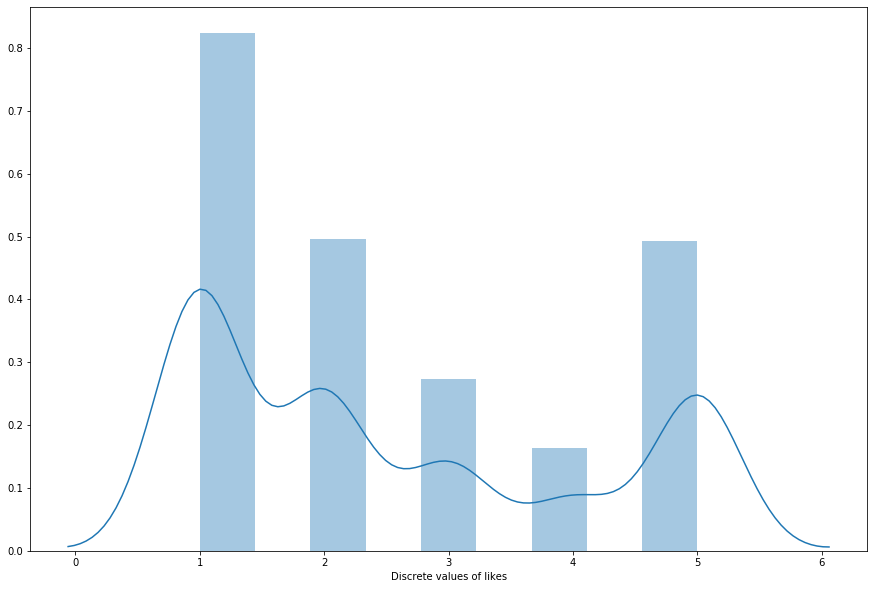

In [70]:
# distribution of trending video likes
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(disc_likes)
ax.set(xlabel='Discrete values of likes')

In [64]:
print(len(videos_df[videos_df['ratings_disabled'] == True]))

11
